(730, 730)
[206560. 210231. 215733. 258719. 258719. 317445. 385674. 459834. 495290.
 495290.]


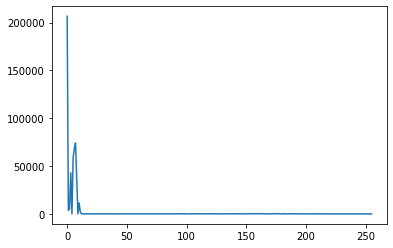

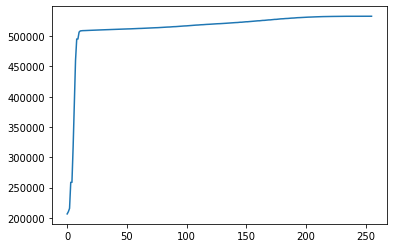

In [2]:
import numpy as np
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

im1 = Image.open('low-contrast-04.jpg')
a = np.array(im1)[:,:,0]
print(a.shape)
im1.show()
h = np.histogram(a,bins=256)
cdf_a = np.zeros(256)
for i in range(256):
    cdf_a[i] = cdf_a[i-1] + h[0][i]
fig1 = plt.figure()
plt.plot(h[0]) 
#plt.savefig('low-contrast-04h.png')
fig2 = plt.figure()
plt.plot(cdf_a)
print(cdf_a[:10])

In [3]:
b = np.zeros(a.shape, dtype = np.uint8)
t = 255/((b.shape[0]*b.shape[1])-cdf_a[0])
for x in range(b.shape[0]):
    for y in range(b.shape[1]):
        b[x][y] = (cdf_a[a[x][y]] - cdf_a[0])* t
im2 = Image.fromarray(b,mode = 'L')
im2.show()
im2.save('low-contrast-04a.jpg')

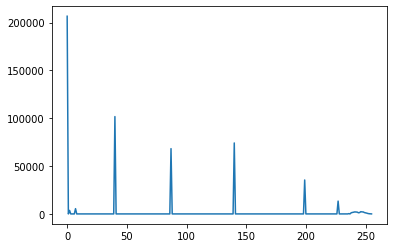

In [4]:
h_b = np.histogram(b,bins=256)
fig4 = plt.figure()
plt.plot(h_b[0])
plt.savefig('low-contrast-04aeqh.png')